# Covid-19 Tweets Text Mining

In [12]:
import pandas as pd
import numpy as np
from IPython.display import display
from google.colab import drive

drive.mount('/content/drive/')
%cd "/content/drive/My Drive/GitHub Projects/Covid-19-Tweets-Text-Mining"
!ls

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/My Drive/GitHub Projects/Covid-19-Tweets-Text-Mining
Corona_NLP_test.csv   coronavirus_tweets.py	  main_corona.py
Corona_NLP_train.csv  covid_19_text_mining.ipynb  README.md


## Read Training Data

In [20]:
trainDataPath = "./Corona_NLP_train.csv"
trainData = pd.read_csv(trainDataPath, encoding='latin-1')

## The Possible Sentiments

In [27]:
sentiments = trainData['Sentiment'].unique()
print("Possible sentiments:")
print(sentiments)

Possible sentiments:
['Neutral' 'Positive' 'Extremely Negative' 'Negative' 'Extremely Positive']


Distribution of all sentiments.

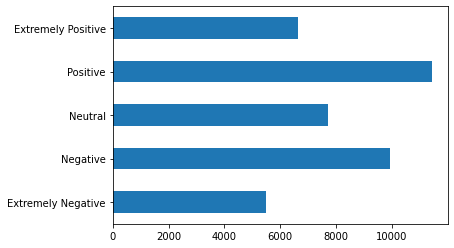

In [32]:
sentiDistribution = trainData['Sentiment'].value_counts()
# sentiDistribution.plot.barh(x='Sentiments', y='Numbers')
sentiDistribution = sentiDistribution.reindex(index=['Extremely Negative', 'Negative', 'Neutral', 'Positive', 'Extremely Positive'])
sentiDistribution.plot.barh(x='Sentiments', y='Numbers')

Average sentiment per day.

16-03-2020    3
17-03-2020    1
18-03-2020    3
19-03-2020    3
20-03-2020    3
21-03-2020    3
22-03-2020    3
23-03-2020    3
24-03-2020    3
25-03-2020    3
26-03-2020    3
27-03-2020    1
28-03-2020    4
29-03-2020    3
30-03-2020    3
31-03-2020    3
01-04-2020    3
02-04-2020    3
03-04-2020    3
04-04-2020    3
05-04-2020    3
06-04-2020    3
07-04-2020    3
08-04-2020    3
09-04-2020    3
10-04-2020    3
11-04-2020    3
12-04-2020    3
13-04-2020    3
14-04-2020    3
dtype: int64


ConversionError: ignored

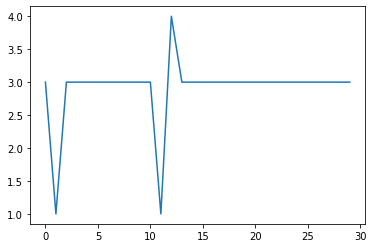

In [45]:
dates = trainData['TweetAt'].unique()
mostPopSentis = []
for date in dates:
  dailyData = trainData[(trainData['TweetAt'] == date)]
  mostPopSenti = dailyData['Sentiment'].value_counts().index[0]
  mostPopSentis.append(mostPopSenti)

sentiMap = {'Extremely Negative': 0, 'Negative': 1, 'Neutral': 2 , 'Positive': 3, 'Extremely Positive': 4}
most

dailySentiDistribution = dailySentiDistribution.apply(lambda senti: sentiMap[senti])
print(dailySentiDistribution)
pic = dailySentiDistribution.plot(x='dates', y='most popular sentiment', yticks=['Extremely Negative', 'Negative', 'Neutral', 'Positive', 'Extremely Positive'])


## Preprocess

Convert message to lower case.